Import necessary packages: Numpy, Pandas, matplotlib

In [599]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [600]:
path_to_train = '../assignment_1/zip.train'
path_to_test = '../assignment_1/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. You can choose which digits you want to classify youself

X_train = X_train[np.logical_or(y_train == 8, y_train == 9)]
X_test = X_test[np.logical_or(y_test == 8, y_test == 9)]

In [601]:
y_train = y_train[np.logical_or(y_train == 8, y_train == 9)]
y_test = y_test[np.logical_or(y_test == 8, y_test == 9)]

In [602]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


In [603]:
X_train.shape

(1186, 256)

In [604]:
y_test.ndim

1

In [605]:
X_test.ndim

2

(90,)


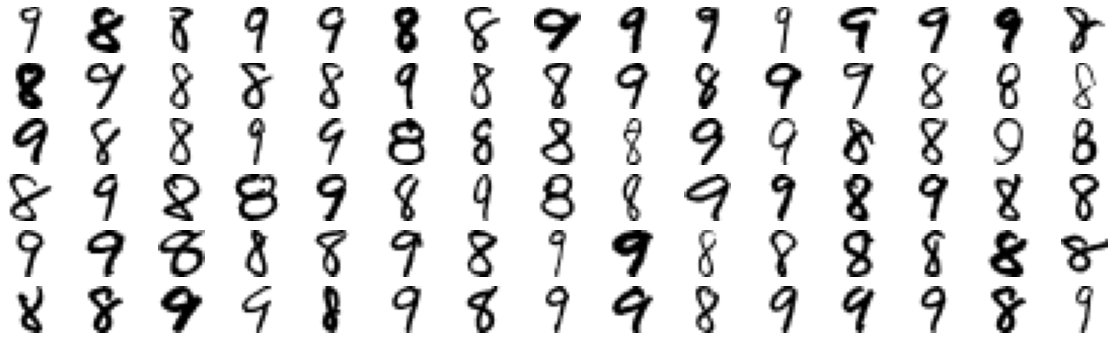

In [606]:
show_numbers(X_train)

Implement Logistic Regression, do gradient descent until training converges (find a good criterion for when that is the case yourself) and test the accuracy on your test data.

In [656]:
# Logistic Regression
class LogisticRegression():
    def __init__(self):
        self.learning_rate = 0.1
        self.iterations = 1000
        self.tolerance = 1e-4
        self.coef = None
        self.inter = None
        self.w = None


    def fit(self, my_X, my_y):
        """
        Minimize cross entropy loss
        """
        y = np.copy(my_y)
        X = np.copy(my_X)
        self.check_input(X, y)

        # one-hot encoding the labels
        label_0 = np.unique(y)[0]
        label_1 = np.unique(y)[1]  
        y[y == label_0] = 0
        y[y == label_1] = 1

        # Initialize fit
        rows_number = X.shape[0]
        rows_number = y.shape[0]
        print(X.shape[0], y.shape)
        feature_number = X.shape[1]
        ones = np.ones(shape=(feature_number))
        zero = np.zeros(shape=1)
        w = np.concatenate((ones, zero))
        yhat = self.sigmoid(w,X)
        loss = self.loss(y, yhat)/rows_number

        for iteration in range(self.iterations):
            print(iteration)
            w_new = w - self.learning_rate*self.grad(X, y, yhat)
            yhat_new = self.sigmoid(w_new,X)
            loss_new = self.loss(y, yhat_new)/rows_number

            # If last iteration is reached then notify user
            if iteration == self.iterations-1:
                print("Iteration limit reached")
                print(f'Loss difference: {loss-loss_new}')
                print(f'Last coeficients: {w_new[:-1]}')
                print(f'Last intercept: {w_new[-1]}')
                print(f'You can start a new ')

            # update variables
            if loss-loss_new>self.tolerance:
                w = w_new
                yhat = yhat_new
                loss = loss_new
                #print('new',w,yhat,loss)
            else:
                break

        self.w = w
        self.coef = w[:-1]
        self.inter = w[-1]

        print('yhat',yhat)
    
    def grad(self, X, y, yhat):
        X_r =  self.reshape(X)
        return - np.dot(X_r.T,(y-yhat))
    
    def reshape(self, X):
        bias = np.ones(shape=(X.shape[0],1))
        return np.concatenate((X, bias),axis=1)        

    def loss(self, y, yhat):
        loss = - np.dot(y,np.log(yhat)) - np.dot((1-y),np.log(1-yhat))
        return loss

    def check_input(self, X, y):
        if not isinstance(X,np.ndarray):
            print(f"Numpy array expected! Instead a {type(X)} was passed")
        if X.ndim != 2:
            print(f"Two dimentional X array expected! \
                Instead a {X.ndim}-dimentional X array was passed")
        if not isinstance(y,np.ndarray):
            print(f"Numpy array expected! Instead a {type(y)} was passed")
        if y.ndim != 1:
            print(f"One dimentional y array expected! \
                Instead a {y.ndim}-dimentional y array was passed")
        if y.shape[0] != X.shape[0]:
            print(f"X and y have incompatible shape")
        if np.unique(y).shape !=(2,):
            print(f"Found more than two unique values in y.\
                Try softmax instead of Logistic Regression")
        
    def sigmoid(self,w,X):
        '''
        Calculate predicted value yhat for a given self.w 
        yhat = 1/(1+exp(-Xw))
        X can be 1-D array, contaning the feature values or
        X can be 2-d array contaning the featture values in different rows
        '''
        X_r = self.reshape(X)
        Xdotw = np.dot(X_r,w)
        #print('Xdotw',Xdotw)
        return 1/(1+np.exp(-Xdotw))

    def predict(self,X):
        prob_label_0 = self.sigmoid(self.w,X)
        prob_label_1 = 1-self.sigmoid(self.w,X)
        return (prob_label_0,prob_label_1)

    def set_initial_coeficients(self,w_init):
        self.coef = w_init
        return w_init
    
    def set_initial_intercept(self,intercept):
        self.inter  = intercept
        return intercept
           
    def coeficients(self):
        return self.coef

    def intersept(self):
        return self.inter

In [657]:
X_test_test = np.array([[0,1],[1,0],[0,1],[1,0]])
X_test_test

array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0]])

In [658]:
y_test_test = np.array([1,0,1,0])

In [659]:
model = LogisticRegression()
model.fit(X_test_test,y_test_test)

4 (4,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
yhat [0.97766248 0.0223406  0.97766248 0.0223406 ]


Logistic Regression can be interpreted as a neural network with just a single layer. It uses the Cross Entropy to measure the performance of the layer (i.e. of the "trained" weight **w**). In ML we call this the **Loss function**. 

What happens when you take the Means Squared Error (MSE) instead of the Cross Entropy? Does this also work? Implement MSE and try for yourself.


(Optional) Can you think of a way to classify more than one class (in this case 10 classes)? How would you change the way **w** is defined?

In [660]:
y_train[0:7]

array([8., 8., 8., 8., 8., 8., 9.])

In [668]:
model.fit(X_train[0:10],y_train[0:10])

10 (10,)
0
1
2
3
4
5
6
7
8
yhat [1.26018235e-03 1.36716573e-15 3.05183724e-15 4.36514971e-19
 4.07594186e-13 2.29753875e-16 8.84222683e-01 1.54008130e-01
 9.87536311e-01 1.53584386e-04]


In [662]:
from sklearn.linear_model import LogisticRegression as SkLR

In [663]:
sklr = SkLR(max_iter=1000, tol=1e-4, penalty='none')
obj = sklr.fit(X_train[0:7],y_train[0:7])
sklr.predict_proba(X_train[0:7])


array([[9.99994020e-01, 5.98029433e-06],
       [9.99993229e-01, 6.77089211e-06],
       [9.99990503e-01, 9.49680162e-06],
       [9.99986433e-01, 1.35670269e-05],
       [9.99998508e-01, 1.49224337e-06],
       [9.99998611e-01, 1.38941336e-06],
       [3.05377301e-05, 9.99969462e-01]])

In [664]:
pred = sklr.predict(X_train[0:7])
pred

array([8., 8., 8., 8., 8., 8., 9.])

In [665]:
y_train

array([8., 8., 8., ..., 8., 8., 9.])

In [666]:
sklr = SkLR()
obj = sklr.fit(X_train,y_train)
pred = sklr.predict(X_test)
sklr.predict_proba(X_train)

array([[9.99935860e-01, 6.41395006e-05],
       [9.98788580e-01, 1.21141971e-03],
       [9.95676413e-01, 4.32358690e-03],
       ...,
       [9.96122210e-01, 3.87778997e-03],
       [8.93350187e-01, 1.06649813e-01],
       [9.22043677e-07, 9.99999078e-01]])

In [667]:
1/(1+np.exp(-1))

0.7310585786300049